##**Capstone Project: Emotion Detection - Model Building**

#**Problem Statement**
**Context**

​Human beings communicate with each other in the form​ ​of speech, gestures, and emotions. As such, systems that can​ ​recognize the same are in great demand in many fields that aim to automate these visual and audio cues to communication. With respect to artificial intelligence, a computer will be able to interact with humans much more naturally if they are capable of understanding human emotions. Such a system would also be of great help in counseling and other healthcare-related fields.

The scope of applications for automatic facial emotion recognition is endless. For example, In an E-Learning system, the presentation style may even be varied​ ​depending on the student’s emotional state.

However, in many cases, static emotion detection alone is not very useful all by itself. It is essential to be aware of the user’s feelings over a period of time in a live environment.



Objective
The objective of the problem statement is to detect the Facial Emotions (Happy or Not happy) of a person.



Data Dictionary
This dataset contains 4446 48x48 grayscale images which are divided into two classes - Happy or Not happy



Note: You will get a zip folder containing the image dataset along with a sample notebook having instructions on how to get that dataset in Google Colab.

In [ ]:
# !pip install tensorflow==2.17.0 numpy==1.26.4 scikit-learn==1.5.2

In [1]:
import os  # Provides a way to interact with the operating system
import numpy as np  # For numerical computations and random number generation
import random  # Python’s built-in random module for reproducibility
import tensorflow as tf  # TensorFlow for building and training models
import sklearn
import matplotlib.pyplot as plt


# Ensure TensorFlow uses deterministic algorithms for operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'  # Make TensorFlow's operations deterministic
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # Ensure CuDNN uses deterministic algorithms

# Optional: Force TensorFlow to use the CPU instead of the GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # To run on CPU only

# Set a global random seed to ensure reproducibility across libraries
seed = 42  # Define a consistent seed value
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)  # Set the seed for NumPy's random number generator
random.seed(seed)  # Set the seed for Python’s built-in random module
tf.random.set_seed(seed)  # Set the seed for TensorFlow’s random operations

from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define path to the dataset ZIP file
zip_path = "/content/drive/MyDrive/Python Course/Emotions+Detection+-+Dataset.zip"

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/emotion_dataset")

# Check if extraction was successful
os.listdir("/content/emotion_dataset")

# Path to the 'Training' folder
training_folder = "/content/emotion_dataset/Training"

# List the contents of the 'Training' folder
os.listdir(training_folder)
# Path to the 'Train' folder
train_folder = "/content/emotion_dataset/Training/Train"
test_folder = "/content/emotion_dataset/Training/Test"


print(f"TensorFlow Version: {tf.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"scikit-learn Version: {sklearn.__version__}")
# List the contents of the 'Train' folder
print("Labels in train folder:", os.listdir(train_folder))
print("Labels in test folder", os.listdir(test_folder))

Mounted at /content/drive
TensorFlow Version: 2.17.0
NumPy Version: 1.26.4
scikit-learn Version: 1.5.2
Labels in train folder: ['Not_Happy', 'Happy']
Labels in test folder ['Not_Happy', 'Happy']


**Data Pre-processing**

In [2]:
from PIL import Image
import os
import numpy as np

# Paths to the Train and Test folders
train_folder = "/content/emotion_dataset/Training/Train"
test_folder = "/content/emotion_dataset/Training/Test"

# Function to load images from a folder (Train/Test)
def load_images_from_folder(folder):
    image_data = []
    labels = []

    # Loop through emotion folders ('Happy' and 'Not_Happy') in a consistent order
    for emotion_label in sorted(os.listdir(folder)):
        emotion_folder = os.path.join(folder, emotion_label)

        if os.path.isdir(emotion_folder):  # Check if it's a directory
            # Loop through image files in a consistent order
            for image_file in sorted(os.listdir(emotion_folder)):
                image_path = os.path.join(emotion_folder, image_file)

                # Open the image and convert it to RGB
                img = Image.open(image_path).convert('RGB')

                # Resize the image to 48x48 pixels
                img = img.resize((48, 48))

                # Convert the image to a NumPy array (48x48x3)
                img_array = np.array(img)

                # Append the image and its label to the lists
                image_data.append(img_array)
                labels.append(emotion_label)  # 'Happy' or 'Not_Happy'

    # Convert lists to NumPy arrays
    return np.array(image_data), np.array(labels)

# Load the Train and Test datasets
X_train, y_train = load_images_from_folder(train_folder)
X_test, y_test = load_images_from_folder(test_folder)

# Check the shapes of the loaded datasets
print(f"Processed {len(X_train)} training images with shape {X_train.shape}.")
print(f"Processed {len(X_test)} testing images with shape {X_test.shape}.")

Processed 4022 training images with shape (4022, 48, 48, 3).
Processed 424 testing images with shape (424, 48, 48, 3).


*   The training and testing data are loaded from separate folders containing the 'Happy' and 'Not_Happy' images.
*   Images are resized to 48x48 pixels and converted to RGB.

*   The images are kept in their original 3-channel (RGB) format with a shape of (48, 48, 3).

*   A total of 4022 training images and 424 testing images are successfully loaded with their corresponding labels.

Exploratory Data Analysis (EDA):

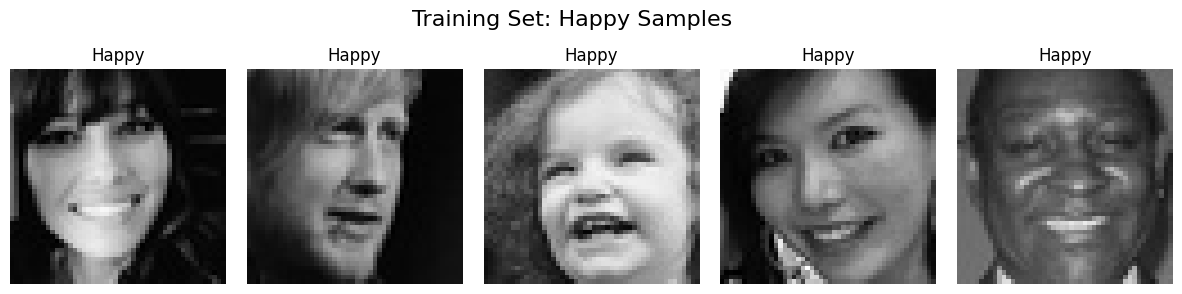

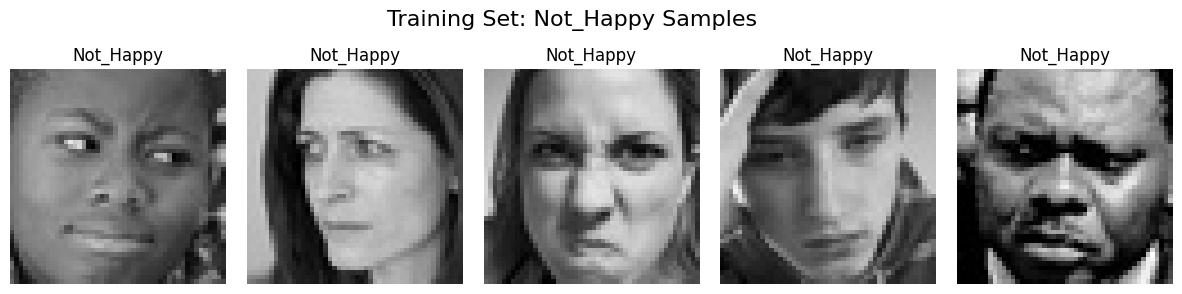

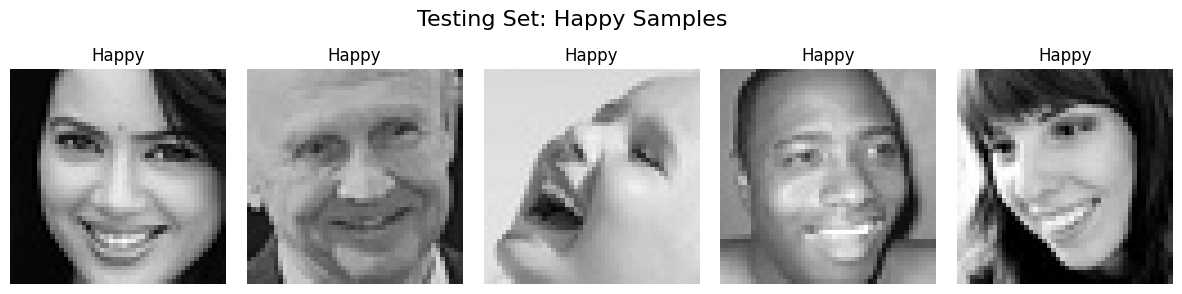

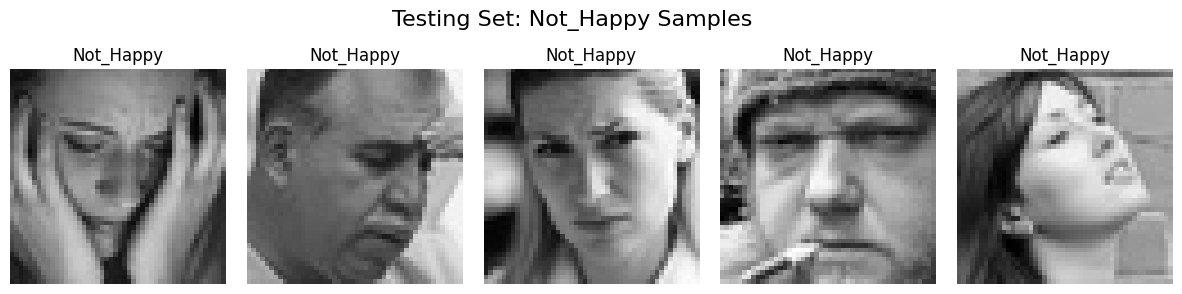

In [3]:
# Function to visualize random images from the dataset
def visualize_random_images(X, y, label, num_samples=5, set_name="", seed=None):
    if seed is not None:
        # Set both numpy and random seeds for reproducibility
        np.random.seed(seed)
        random.seed(None)

    label_indices = np.where(y == label)[0]
    sample_indices = random.sample(list(label_indices), num_samples)

    # Plot the images
    fig, axs = plt.subplots(1, num_samples, figsize=(15, 3))
    fig.suptitle(f"{set_name}: {label} Samples", fontsize=16, y=1.05)  # Adjust title position)

    for i, idx in enumerate(sample_indices):
        img = X[idx].reshape(48, 48, 3)  # Reshape to 48x48x3
        axs[i].imshow(img.astype(np.uint8))
        axs[i].axis('off')
        axs[i].set_title(f"{label}")

    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing between plots
    plt.show()

# Visualize 5 random 'Happy' images from the training set (Row 1)
visualize_random_images(X_train, y_train, 'Happy', set_name="Training Set", seed=seed)

# Visualize 5 random 'Not Happy' images from the training set (Row 2)
visualize_random_images(X_train, y_train, 'Not_Happy', set_name="Training Set", seed=seed)

# Visualize 5 random 'Happy' images from the testing set (Row 3)
visualize_random_images(X_test, y_test, 'Happy', set_name="Testing Set", seed=seed)

# Visualize 5 random 'Not Happy' images from the testing set (Row 4)
visualize_random_images(X_test, y_test, 'Not_Happy', set_name="Testing Set", seed=seed)

# Observation:
- The visualizations confirm that the dataset contains clearly distinguishable "Happy" and "Not_Happy" images.
- The random selection from both the training and testing sets shows a balanced representation of each class.
- This step helps verify that the image data and labels have been correctly loaded and processed, ensuring the integrity of the dataset.

Training Set Label Distribution:
Not_Happy    2022
Happy        2000
Name: count, dtype: int64

Testing Set Label Distribution:
Not_Happy    224
Happy        200
Name: count, dtype: int64


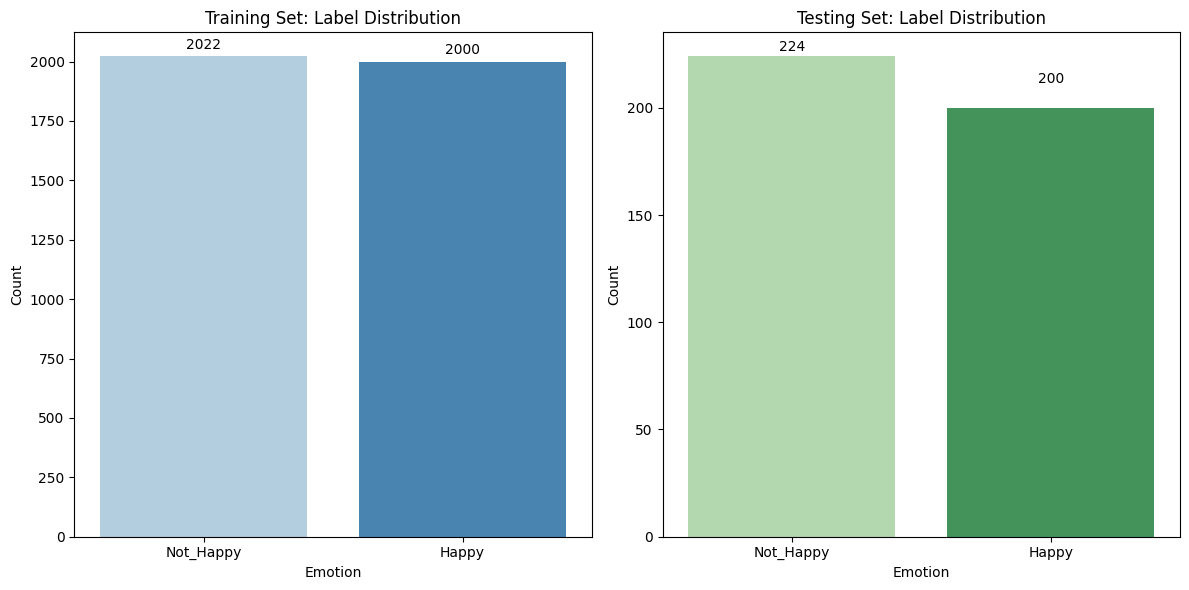

In [4]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppress specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert labels into Pandas Series for easy counting
train_label_counts = pd.Series(y_train).value_counts()
test_label_counts = pd.Series(y_test).value_counts()

# Display the counts
print("Training Set Label Distribution:")
print(train_label_counts)

print("\nTesting Set Label Distribution:")
print(test_label_counts)

# Plotting the label distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Training set label distribution
sns.barplot(x=train_label_counts.index, y=train_label_counts.values, ax=axs[0], palette="Blues", hue=train_label_counts.index, dodge=False)
axs[0].legend([],[], frameon=False)  # To hide the legend
axs[0].set_title("Training Set: Label Distribution")
axs[0].set_xlabel("Emotion")
axs[0].set_ylabel("Count")

# Annotate the counts inside the bars
for i, count in enumerate(train_label_counts.values):
    axs[0].text(i, count + 20, str(count), ha='center', va='bottom')

# Testing set label distribution
sns.barplot(x=test_label_counts.index, y=test_label_counts.values, ax=axs[1], palette="Greens", hue=test_label_counts.index, dodge=False)
axs[1].legend([],[], frameon=False)  # To hide the legend
axs[1].set_title("Testing Set: Label Distribution")
axs[1].set_xlabel("Emotion")
axs[1].set_ylabel("Count")

# Annotate the counts inside the bars
for i, count in enumerate(test_label_counts.values):
    # Adjust the placement for the 224 label specifically
    offset = 1 if count == 224 else 10
    axs[1].text(i, count + offset, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Label Distribution Visualization:
- This code visualizes the distribution of "Happy" and "Not Happy" labels in both the training and test sets.
- Bars display the count of images for each label, annotated with the exact values.
- Helps to ensure class balance and identify any potential imbalances between classes in both datasets.
- This balanced class distribution will support the models in learning without bias towards one particular class.

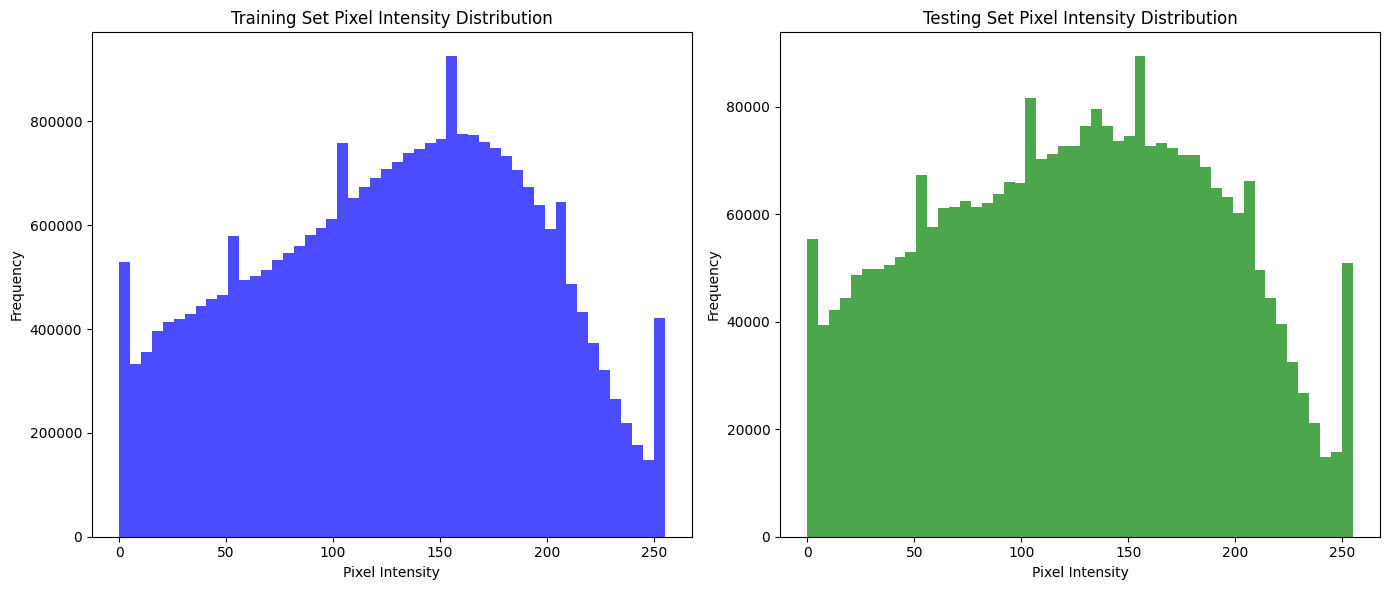

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate pixel intensity distributions for both the training and test sets
train_pixel_intensity = X_train.flatten()
test_pixel_intensity = X_test.flatten()

# Plot the distribution for both sets
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Training set pixel intensity distribution
axs[0].hist(train_pixel_intensity, bins=50, color='blue', alpha=0.7)
axs[0].set_title('Training Set Pixel Intensity Distribution')
axs[0].set_xlabel('Pixel Intensity')
axs[0].set_ylabel('Frequency')

# Testing set pixel intensity distribution
axs[1].hist(test_pixel_intensity, bins=50, color='green', alpha=0.7)
axs[1].set_title('Testing Set Pixel Intensity Distribution')
axs[1].set_xlabel('Pixel Intensity')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- This visualization shows the distribution of pixel intensities in both the training and testing sets.
- The training and testing sets exhibit a slight difference in pixel intensity distribution, with both peaking around 150.
- This suggests that most of the images have mid-tone grayscale values, with fewer images having either very dark or very light tones.

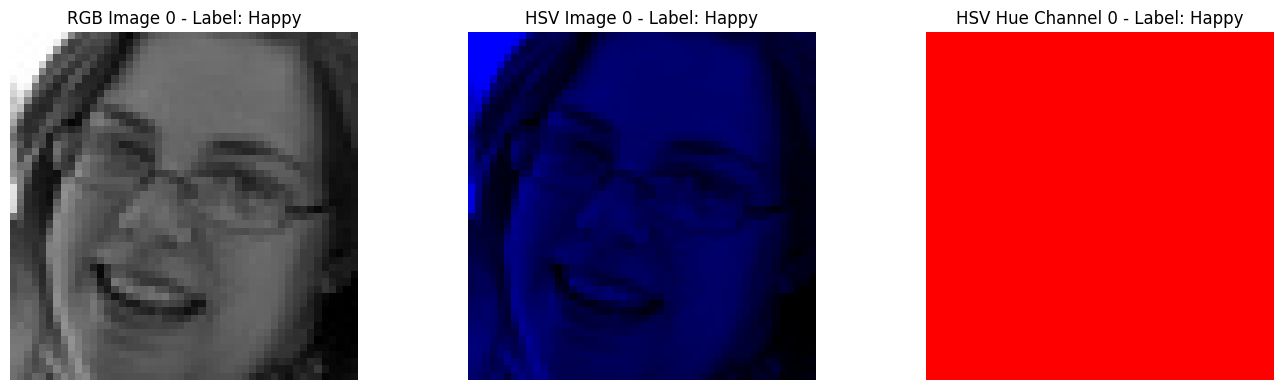

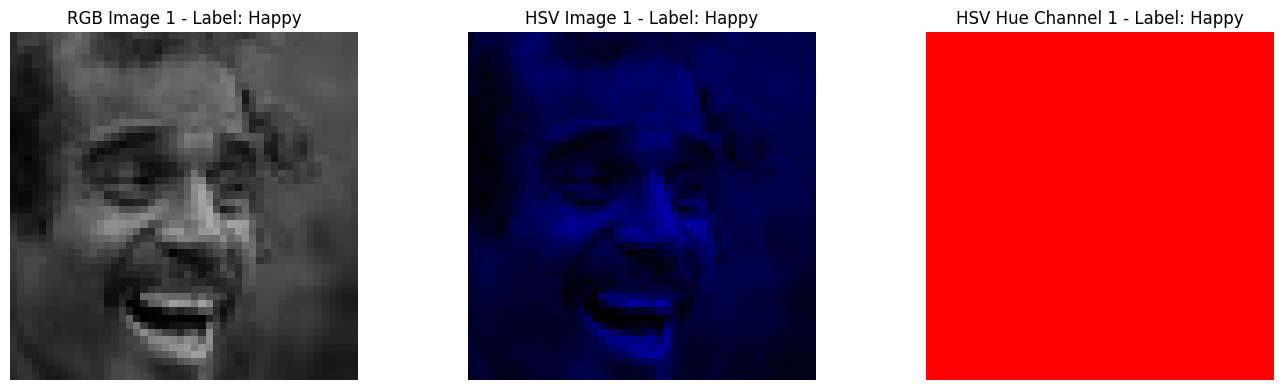

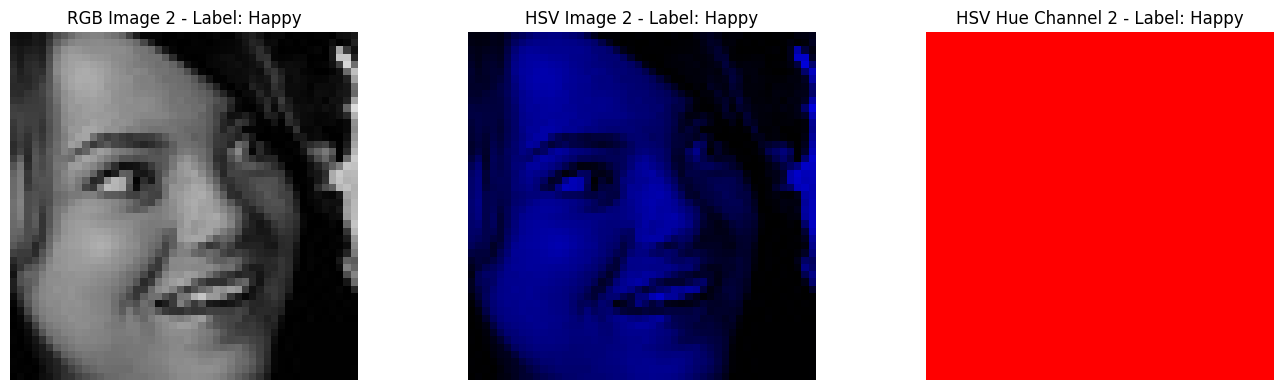

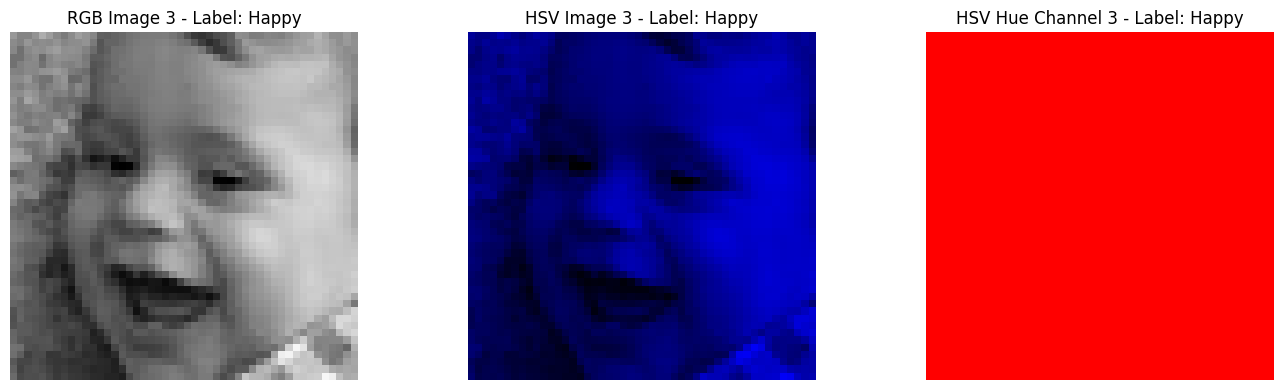

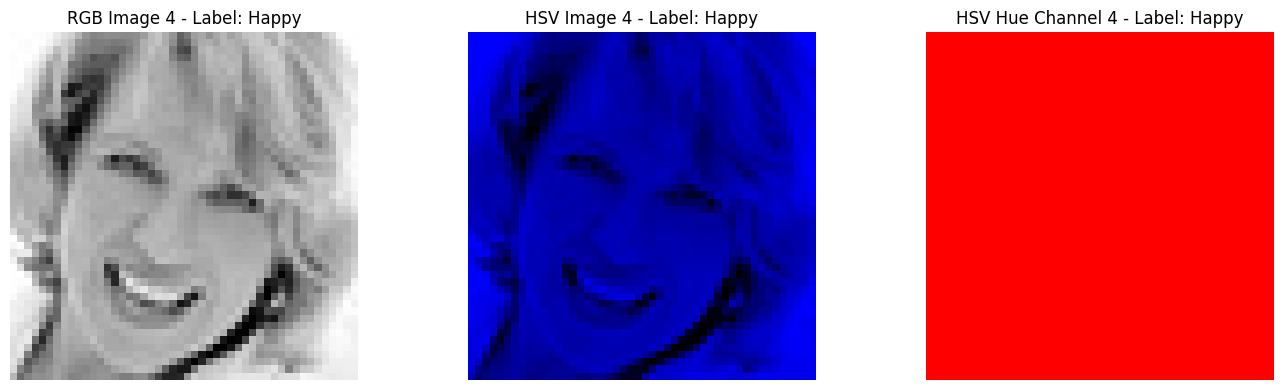

In [6]:
import cv2

# Function to plot RGB and HSV images
def plot_rgb_hsv_images(X, y, idx, label):
    # Extract the image from the flattened data
    img_rgb = X[idx].reshape(48, 48, 3).astype(np.uint8)  # Convert to uint8

    # Convert to HSV
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(14, 4))

    # RGB image
    axs[0].imshow(img_rgb)
    axs[0].set_title(f"RGB Image {idx} - Label: {y[idx]}")
    axs[0].axis('off')

    # HSV image
    axs[1].imshow(img_hsv)
    axs[1].set_title(f"HSV Image {idx} - Label: {y[idx]}")
    axs[1].axis('off')

    # Plot each channel of HSV separately
    axs[2].imshow(img_hsv[:, :, 0], cmap='hsv')
    axs[2].set_title(f"HSV Hue Channel {idx} - Label: {y[idx]}")
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

# Sample images to visualize
sample_indices = [0, 1, 2, 3, 4]  # You can change these to visualize other images

for idx in sample_indices:
    plot_rgb_hsv_images(X_train, y_train, idx, y_train[idx])

**Observations:**

The RGB images appear primarily grayscale, as shown earlier, with minimal color information in this dataset. The HSV representation displays a consistent low variation in hue across all images, further indicating that color is not a significant factor for emotion classification. Instead, texture and intensity patterns seem to be more critical for detecting emotions.

In [7]:
# Function to check if all R, G, and B channels are identical (grayscale)
def check_if_grayscale(X):
    # Reshape the data back to (num_images, 48, 48, 3) for RGB format
    X_reshaped = X.reshape(-1, 48, 48, 3)

    # Initialize list to keep track of grayscale results for each image
    grayscale_flags = []

    for idx, img in enumerate(X_reshaped):
        # Check if all the values in the R, G, and B channels are equal
        if np.all(img[:, :, 0] == img[:, :, 1]) and np.all(img[:, :, 1] == img[:, :, 2]):
            grayscale_flags.append(True)
        else:
            grayscale_flags.append(False)

    # Count how many images are grayscale
    grayscale_count = np.sum(grayscale_flags)
    total_images = len(grayscale_flags)

    print(f"Out of {total_images} images, {grayscale_count} are confirmed to be grayscale.")

    return grayscale_flags

# Check grayscale status for training set
grayscale_train = check_if_grayscale(X_train)

# Check grayscale status for testing set
grayscale_test = check_if_grayscale(X_test)

Out of 4022 images, 4022 are confirmed to be grayscale.
Out of 424 images, 424 are confirmed to be grayscale.


#**Key Observation:**
All 4022 images in the training set and all 424 images in the testing set are grayscale images, with identical pixel values across the R, G, and B channels.

In [8]:
# Normalize pixel values (scale between 0 and 1)
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

print(f"Training set normalized shape: {X_train_normalized.shape}")
print(f"Testing set normalized shape: {X_test_normalized.shape}")

from sklearn.preprocessing import LabelEncoder
import joblib

# Step 1: Encode the target labels
label_encoder = LabelEncoder()

# Fit the LabelEncoder with the sorted class names to ensure consistency
label_encoder.fit(sorted(['Happy', 'Not_Happy']))

# Transform the labels using the fitted encoder
y_train_encoded = label_encoder.transform(y_train)  # Transform on training labels
y_test_encoded = label_encoder.transform(y_test)  # Transform on test labels

# Step 2: Save the fitted LabelEncoder to maintain consistency across sessions
joblib.dump(label_encoder, '/content/drive/MyDrive/label_encoder.pkl')

# Step 3: Load the saved LabelEncoder in future runs (if needed)
loaded_encoder = joblib.load('/content/drive/MyDrive/label_encoder.pkl')

# Step 4: Verify encoding
print(f"Label Encoding: {loaded_encoder.classes_}")
print(f"Sample encoded labels (Train): {y_train_encoded[:25]}")
print(f"Sample encoded labels (Test): {y_test_encoded[:25]}")

# Ensure no mismatch in encoding between train and test
assert set(y_train_encoded) <= set(loaded_encoder.transform(['Happy', 'Not_Happy']))
assert set(y_test_encoded) <= set(loaded_encoder.transform(['Happy', 'Not_Happy']))

print("Train and test labels are encoded consistently!")

# Check class distribution in train and test sets
unique_train, counts_train = np.unique(y_train_encoded, return_counts=True)
unique_test, counts_test = np.unique(y_test_encoded, return_counts=True)

print(f"Train class distribution: {dict(zip(unique_train, counts_train))}")
print(f"Test class distribution: {dict(zip(unique_test, counts_test))}")

Training set normalized shape: (4022, 48, 48, 3)
Testing set normalized shape: (424, 48, 48, 3)
Label Encoding: ['Happy' 'Not_Happy']
Sample encoded labels (Train): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Sample encoded labels (Test): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Train and test labels are encoded consistently!
Train class distribution: {0: 2000, 1: 2022}
Test class distribution: {0: 200, 1: 224}


**Label Encoding:**

- The labels have been successfully encoded into binary values (0 for "Happy" and 1 for "Not_Happy"). This confirms that the model will now work with numerical labels for the classification task.

# Base ANN Model for Emotion Detection

- In this section, we build a basic Artificial Neural Network (ANN) model to establish a performance baseline for emotion detection.

- We implement several measures to ensure reproducibility, including setting random seeds, using deterministic algorithms in TensorFlow, and applying a custom callback for deterministic shuffling of data between epochs.

- The model consists of a flattened input layer, two hidden layers with ReLU activation, and an output layer with a sigmoid activation function to support binary classification.

- We also include early stopping to prevent overfitting.

**Objective:** Establish a baseline accuracy with the base ANN model. We will later optimize this ANN model to improve its performance, followed by developing and refining CNN and transfer learning models to see if they offer further improvements.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5453 - loss: 1.1091 - val_accuracy: 0.1379 - val_loss: 1.0227
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6330 - loss: 0.6919 - val_accuracy: 0.4596 - val_loss: 0.7556
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6405 - loss: 0.6445 - val_accuracy: 0.4596 - val_loss: 0.7935
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6639 - loss: 0.6167 - val_accuracy: 0.4634 - val_loss: 0.8039
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6758 - loss: 0.6116 - val_accuracy: 0.6907 - val_loss: 0.6228
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6681 - loss: 0.6229 - val_accuracy: 0.3019 - val_loss: 0.9741
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6959 - loss: 0.5891 - val_accuracy: 0.5317 - val_loss: 0.7689
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6849 - loss: 0.5916 - val_accu

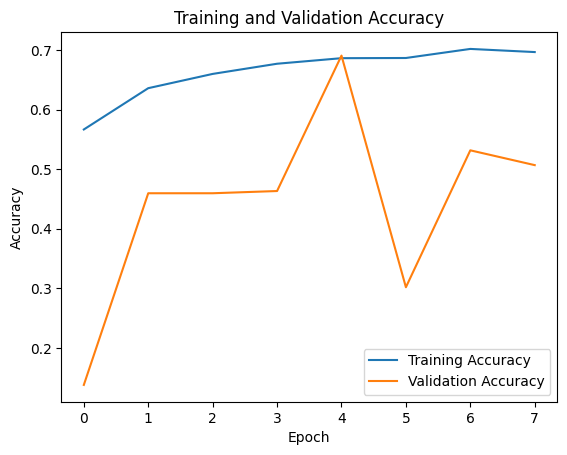

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7444 - loss: 0.5300 
Test Accuracy (Base ANN): 0.650943398475647


In [9]:
import os  # Provides a way to interact with the operating system
import numpy as np  # For numerical computations and random number generation
import random  # Python’s built-in random module for reproducibility
import tensorflow as tf  # TensorFlow for building and training models
import matplotlib.pyplot as plt  # For plotting graphs and visualizations

# Ensure TensorFlow uses deterministic algorithms for operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Optional: Force TensorFlow to use the CPU instead of the GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Uncomment if needed

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Define the custom shuffling reset callback
class ResetShuffling(tf.keras.callbacks.Callback):
    def __init__(self, seed):
        self.seed = seed

    def on_epoch_begin(self, epoch, logs=None):
        np.random.seed(self.seed + epoch)  # Adjust seed per epoch
        tf.random.set_seed(self.seed + epoch)

# Define ANN model with seeded initializer
def create_ann_model(input_shape):
    initializer = tf.keras.initializers.GlorotUniform(seed=seed)  # Seeded initializer
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer))
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer=initializer))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=initializer))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define input shape (48x48x3 for RGB images)
input_shape = (48, 48, 3)

# Create the ANN model
base_ann_model = create_ann_model(input_shape)

# Train the model with the custom shuffling callback
history = base_ann_model.fit(
    X_train_normalized, y_train_encoded,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,  # Enable shuffling between epochs
    callbacks=[
        ResetShuffling(seed),  # Ensure deterministic shuffling
        tf.keras.callbacks.EarlyStopping(patience=3)  # Early stopping to prevent overfitting
    ]
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc_base_ann = base_ann_model.evaluate(X_test_normalized, y_test_encoded)
print(f"Test Accuracy (Base ANN): {test_acc_base_ann}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix (Base ANN):
[[161  39]
 [109 115]]

Classification Report (Base ANN):
              precision    recall  f1-score   support

       Happy       0.60      0.81      0.69       200
   Not_Happy       0.75      0.51      0.61       224

    accuracy                           0.65       424
   macro avg       0.67      0.66      0.65       424
weighted avg       0.68      0.65      0.64       424


ROC-AUC Score (Base ANN): 0.7350


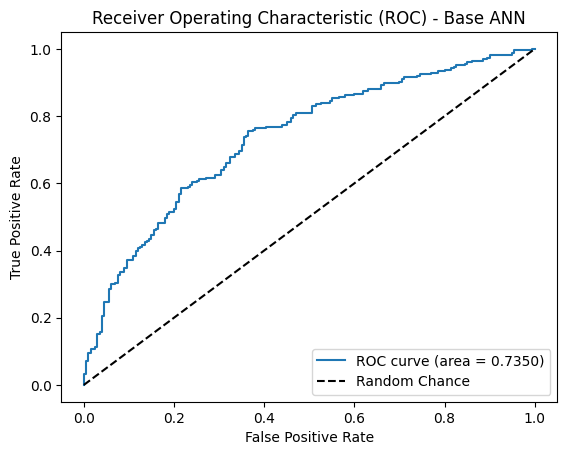

In [10]:

# Predict probabilities for the test set
y_pred_prob_base_ann = base_ann_model.predict(X_test_normalized)

# Convert probabilities to binary predictions (0 or 1)
y_pred_base_ann = (y_pred_prob_base_ann > 0.5).astype("int32")

# Confusion Matrix for Base ANN
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

conf_matrix_base_ann = confusion_matrix(y_test_encoded, y_pred_base_ann)
print("Confusion Matrix (Base ANN):")
print(conf_matrix_base_ann)

# Classification Report for Base ANN
class_report_base_ann = classification_report(
    y_test_encoded, y_pred_base_ann, output_dict=False, target_names=['Happy', 'Not_Happy']
)
print("\nClassification Report (Base ANN):")
print(class_report_base_ann)

# ROC-AUC Score for Base ANN
roc_auc_base_ann = roc_auc_score(y_test_encoded, y_pred_prob_base_ann)
print(f"\nROC-AUC Score (Base ANN): {roc_auc_base_ann:.4f}")

# Plot ROC Curve for Base ANN
fpr_base_ann, tpr_base_ann, _ = roc_curve(y_test_encoded, y_pred_prob_base_ann)
plt.figure()
plt.plot(fpr_base_ann, tpr_base_ann, label=f"ROC curve (area = {roc_auc_base_ann:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Base ANN')
plt.legend(loc='lower right')
plt.show()

**Results of Base ANN Model:**

- The base ANN model achieved an accuracy of 65%, indicating moderate performance on the classification task.

- The confusion matrix reveals a higher recall for the "Happy" class (81%), meaning it effectively identifies positive cases but struggles more with the "Not Happy" class (51% recall).

- Precision for "Not Happy" is relatively high at 75%, though overall F1-scores are 0.69 for "Happy" and 0.61 for "Not Happy."

- The ROC-AUC score of 0.735 suggests that the model has some ability to distinguish between the two classes, but there is room for improvement.

These results serve as a baseline and highlight the need for further optimization or exploration of more complex architectures, such as CNNs and transfer learning models, to potentially improve classification performance.


# Optimized ANN Model for Emotion Detection

This section presents an optimized version of the ANN model designed to improve classification performance. Key changes include:

1. **Architecture Enhancements**:
   - **Dense Layers with Batch Normalization**: The model includes two dense layers, each followed by batch normalization to stabilize training, and dropout layers for regularization to prevent overfitting.
   - **Leaky ReLU Activation**: A Leaky ReLU activation function is used instead of ReLU, which allows a small gradient when the unit is not active, potentially improving performance for this dataset.
   - **Seeded Initializers**: Layers are initialized with a seeded GlorotUniform initializer to maintain reproducibility across runs.

2. **Optimization Improvements**:
   - **AdamW Optimizer**: This model employs the AdamW optimizer, which includes weight decay to reduce overfitting while optimizing the learning rate.
   - **Data Augmentation**: Minor augmentations (rotation, shifts, and horizontal flips) are applied to increase data variability and improve model robustness.
   - **Callbacks**: Early stopping and learning rate reduction callbacks are used to avoid overfitting, with patience levels to allow the model to adapt to validation loss and stop training when improvements cease.

**Objective**: This optimized model aims to outperform the baseline ANN in terms of accuracy and generalization, serving as an incremental step before exploring deeper CNN and transfer learning models.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5305 - loss: 0.9278 - val_accuracy: 0.5637 - val_loss: 0.7415 - learning_rate: 1.0000e-04
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.5622 - loss: 0.8208 - val_accuracy: 0.5755 - val_loss: 0.7330 - learning_rate: 1.0000e-04
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.5615 - loss: 0.7869 - val_accuracy: 0.5896 - val_loss: 0.7745 - learning_rate: 1.0000e-04
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.5729 - loss: 0.7676 - val_accuracy: 0.5519 - val_loss: 0.7189 - learning_rate: 1.0000e-04
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.5664 - loss: 0.7660 - val_accuracy: 0.6415 - val_loss: 0.6353 - learning_rate: 1.0000e-04
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.5853 - loss: 0.7496 - val_accuracy: 0.6250 - val_loss: 0.6834 - learning_rate: 1.0000e-04
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.

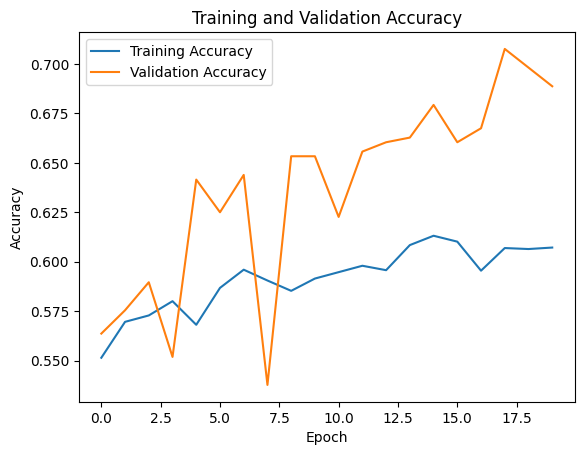

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7215 - loss: 0.5817 
Test Accuracy (Optimized ANN): 0.7075471878051758


In [11]:
import os
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Ensure TensorFlow uses deterministic algorithms
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Optional: Force TensorFlow to use the CPU instead of the GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Uncomment if needed for CPU-only execution

# Define the Optimized ANN Model with seeded initializer
def create_optimized_ann_model(input_shape, learning_rate=0.0001):
    initializer = tf.keras.initializers.GlorotUniform(seed=seed)  # Use seeded initializer

    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))

    # First Dense Block
    model.add(layers.Dense(128, kernel_initializer=initializer))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    # Second Dense Block
    model.add(layers.Dense(64, kernel_initializer=initializer))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializer))

    # Compile with AdamW optimizer
    optimizer = tf.keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=1e-4)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Define input shape (48x48x3 for RGB images)
input_shape = (48, 48, 3)

# Create the optimized ANN model
optimized_ann_model = create_optimized_ann_model(input_shape)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_normalized)

# Reset seed before training to ensure consistent augmentation
np.random.seed(seed)
tf.random.set_seed(seed)

# Train the Optimized ANN Model with callbacks
history = optimized_ann_model.fit(
    datagen.flow(X_train_normalized, y_train_encoded, batch_size=32),
    epochs=20,
    validation_data=(X_test_normalized, y_test_encoded),
    shuffle=True,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.002, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
)

# Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate on the Test Set
test_loss, test_acc_optimized_ann = optimized_ann_model.evaluate(X_test_normalized, y_test_encoded)
print(f"Test Accuracy (Optimized ANN): {test_acc_optimized_ann}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Confusion Matrix (Optimized ANN):
[[147  53]
 [ 71 153]]

Classification Report (Optimized ANN):
              precision    recall  f1-score   support

       Happy       0.67      0.73      0.70       200
   Not_Happy       0.74      0.68      0.71       224

    accuracy                           0.71       424
   macro avg       0.71      0.71      0.71       424
weighted avg       0.71      0.71      0.71       424


ROC-AUC Score (Optimized ANN): 0.7559


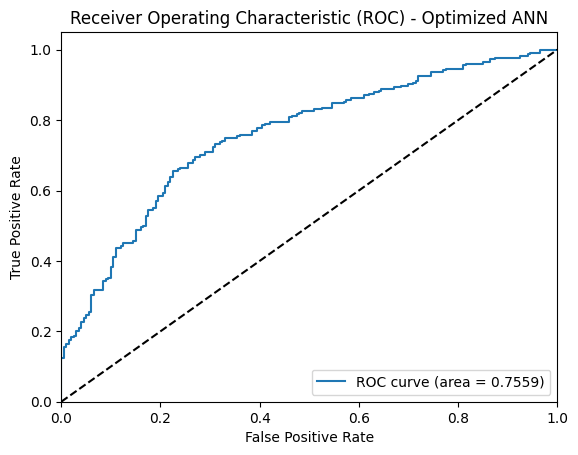

In [12]:
# Generate Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

y_pred_prob_optimized_ann = optimized_ann_model.predict(X_test_normalized)
y_pred_optimized_ann = (y_pred_prob_optimized_ann > 0.5).astype("int32")

conf_matrix_optimized_ann = confusion_matrix(y_test_encoded, y_pred_optimized_ann)
print("\nConfusion Matrix (Optimized ANN):")
print(conf_matrix_optimized_ann)

class_report_optimized_ann = classification_report(y_test_encoded, y_pred_optimized_ann, output_dict=False, target_names=['Happy', 'Not_Happy'])
print("\nClassification Report (Optimized ANN):")
print(class_report_optimized_ann)

roc_auc_optimized_ann = roc_auc_score(y_test_encoded, y_pred_prob_optimized_ann)
print(f"\nROC-AUC Score (Optimized ANN): {roc_auc_optimized_ann:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob_optimized_ann)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_optimized_ann:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Optimized ANN')
plt.legend(loc="lower right")
plt.show()

**Results of Optimized ANN Model:**

- The optimized ANN model achieved an accuracy of 71%, a clear improvement from the baseline model’s 65%. Precision and recall for both "Happy" and "Not Happy" classes are now more balanced, with F1-scores of 0.70 for "Happy" and 0.71 for "Not Happy," indicating better overall classification.

- **Confusion Matrix**:
  - Correctly predicted **147 "Happy"** faces and **153 "Not Happy"** faces.
  - Misclassified **53 "Happy"** faces as "Not Happy" and **71 "Not Happy"** faces as "Happy."
- **ROC-AUC Score**: The ROC-AUC score of 0.7559 demonstrates an enhanced ability to distinguish between classes compared to the baseline.

These improvements highlight the effectiveness of batch normalization, Leaky ReLU activation, and the AdamW optimizer. Overall, the refined architecture and training adjustments have strengthened the model’s predictive capabilities, setting a benchmark for comparison with CNN and transfer learning models.


#**Base CNN Model Setup:**

- The base CNN model incorporates three convolutional layers to capture spatial hierarchies in image data, each followed by max pooling for dimensionality reduction. A final dense layer enables binary classification.

- This setup leverages the Adam optimizer with binary cross-entropy loss, aiming to improve accuracy by learning intricate patterns in the grayscale images that may not have been captured by the ANN. The model’s performance will serve as a foundation for further enhancements in CNN-based architectures.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.5616 - loss: 0.6852 - val_accuracy: 0.6769 - val_loss: 0.6113
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.7347 - loss: 0.5530 - val_accuracy: 0.7500 - val_loss: 0.5028
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.7946 - loss: 0.4453 - val_accuracy: 0.7712 - val_loss: 0.4654
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.8341 - loss: 0.3846 - val_accuracy: 0.7948 - val_loss: 0.4413
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.8504 - loss: 0.3367 - val_accuracy: 0.8090 - val_loss: 0.4038
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.8740 - loss: 0.2904 - val_accuracy: 0.8325 - val_loss: 0.4002
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step - accuracy: 0.8999 - loss: 0.2528 - val_accuracy: 0.8160 - val_loss: 0.4222
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.9059 - loss: 0

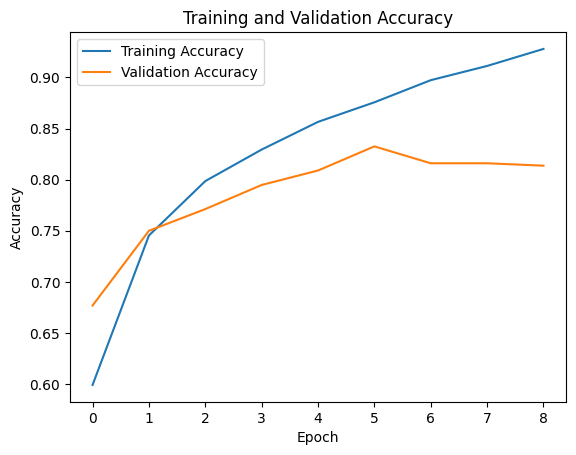

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8526 - loss: 0.3794
Test Accuracy (Base CNN): 0.8325471878051758


In [13]:
import os
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Ensure TensorFlow uses deterministic algorithms
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Optional: Force TensorFlow to use the CPU instead of the GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Uncomment if needed for CPU-only execution

# Define the Base CNN Model with seeded initializer
def create_base_cnn_model(input_shape):
    initializer = tf.keras.initializers.GlorotUniform(seed=seed)  # Seeded initializer

    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializer, input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_initializer=initializer))
    model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializer))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Define input shape (48x48x3 for RGB images)
input_shape = (48, 48, 3)

# Create the Base CNN model
base_cnn_model = create_base_cnn_model(input_shape)

# Train the Base CNN Model
history = base_cnn_model.fit(
    X_train_normalized, y_train_encoded,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_normalized, y_test_encoded),
    shuffle=True,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]
)

# Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate on the Test Set
test_loss, test_acc_base_cnn = base_cnn_model.evaluate(X_test_normalized, y_test_encoded)
print(f"Test Accuracy (Base CNN): {test_acc_base_cnn}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Confusion Matrix (Base CNN):
[[171  29]
 [ 42 182]]

Classification Report (Base CNN):
              precision    recall  f1-score   support

       Happy       0.80      0.85      0.83       200
   Not_Happy       0.86      0.81      0.84       224

    accuracy                           0.83       424
   macro avg       0.83      0.83      0.83       424
weighted avg       0.83      0.83      0.83       424


ROC-AUC Score (Base CNN): 0.9043


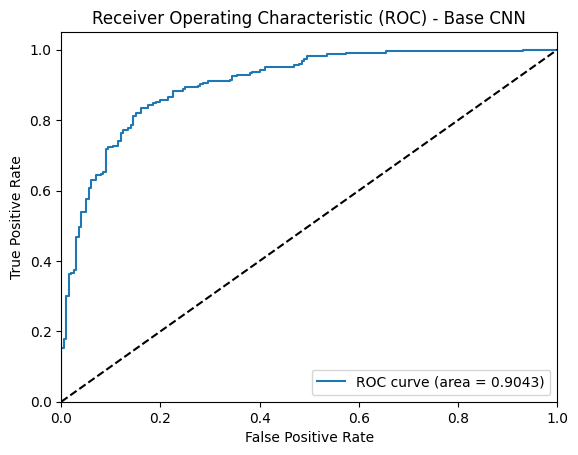

In [14]:
# Predict probabilities for the test set (CNN)
y_pred_prob_base_cnn = base_cnn_model.predict(X_test_normalized)

# Convert probabilities to binary predictions (0 or 1)
y_pred_cnn = (y_pred_prob_base_cnn > 0.5).astype("int32")

# Confusion Matrix for CNN
conf_matrix_base_cnn = confusion_matrix(y_test_encoded, y_pred_cnn)
print("Confusion Matrix (Base CNN):")
print(conf_matrix_base_cnn)

# Classification Report for CNN
class_report_base_cnn = classification_report(
    y_test_encoded, y_pred_cnn, output_dict=False, target_names=['Happy', 'Not_Happy']
)
print("\nClassification Report (Base CNN):")
print(class_report_base_cnn)

# ROC-AUC Score for CNN
roc_auc_base_cnn = roc_auc_score(y_test_encoded, y_pred_prob_base_cnn)
print(f"\nROC-AUC Score (Base CNN): {roc_auc_base_cnn:.4f}")

# ROC Curve for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_encoded, y_pred_prob_base_cnn)
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, label=f"ROC curve (area = {roc_auc_base_cnn:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Base CNN')
plt.legend(loc="lower right")
plt.show()

#**Base CNN Model Results:**

- The base CNN model achieved an overall accuracy of 83% with an impressive ROC-AUC score of 0.90, indicating strong classification performance.

- **Confusion Matrix:** The model correctly identified 171 out of 200 'Not Happy' images and 182 out of 224 'Happy' images.
- **Precision and Recall:** For 'Not Happy', precision was 0.80 and recall was 0.85, while for 'Happy', precision was 0.86 and recall was 0.81, resulting in balanced F1-scores for both classes (0.83 for 'Not Happy' and 0.84 for 'Happy').
  
These results show that the CNN architecture successfully captures essential features, improving classification accuracy over the ANN models and confirming CNN's effectiveness in image-based emotion detection.


#**Optimized CNN Model**:

- This enhanced CNN architecture builds on the baseline by incorporating multiple convolutional blocks with additional regularization techniques (Batch Normalization and Dropout) to improve performance and generalization.

- The model uses HeUniform initialization for kernels and is optimized with Adam. Data augmentation, early stopping, and learning rate reduction are employed to prevent overfitting and dynamically adjust learning.

This approach aims to improve model robustness and increase accuracy in classifying emotions across 'Happy' and 'Not Happy' categories.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.5370 - loss: 0.8259 - val_accuracy: 0.5472 - val_loss: 0.7024 - learning_rate: 0.0010
Epoch 2/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.5869 - loss: 0.7066 - val_accuracy: 0.5236 - val_loss: 0.8405 - learning_rate: 0.0010
Epoch 3/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 41s 166ms/step - accuracy: 0.6069 - loss: 0.6698 - val_accuracy: 0.5542 - val_loss: 0.7043 - learning_rate: 0.0010
Epoch 4/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 41s 170ms/step - accuracy: 0.6550 - loss: 0.6257 - val_accuracy: 0.6769 - val_loss: 0.6064 - learning_rate: 0.0010
Epoch 5/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 41s 168ms/step - accuracy: 0.6716 - loss: 0.6127 - val_accuracy: 0.6368 - val_loss: 0.6525 - learning_rate: 0.0010
Epoch 6/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.6897 - loss: 0.5796 - val_accuracy: 0.7311 - val_loss: 0.5160 - learning_rate: 0.0010
Epoch 7/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.7156 - loss:

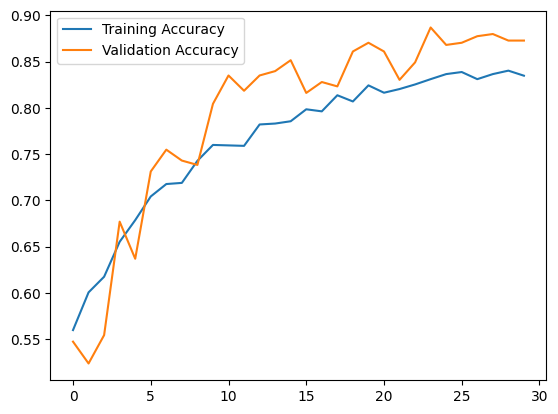

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8668 - loss: 0.3107
Test Accuracy (Optimized CNN): 0.8702830076217651


In [15]:
import os
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure TensorFlow uses deterministic algorithms
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Define the optimized CNN model
def create_optimized_cnn_model(input_shape, learning_rate=0.001):
    model = models.Sequential()

    # Convolutional Block 1
    model.add(layers.Conv2D(32, (3, 3), kernel_initializer=tf.keras.initializers.HeUniform(seed=seed),
                            activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    # Convolutional Block 2
    model.add(layers.Conv2D(64, (3, 3), kernel_initializer=tf.keras.initializers.HeUniform(seed=seed),
                            activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    # Convolutional Block 3
    model.add(layers.Conv2D(128, (3, 3), kernel_initializer=tf.keras.initializers.HeUniform(seed=seed),
                            activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, kernel_initializer=tf.keras.initializers.HeUniform(seed=seed), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(64, kernel_initializer=tf.keras.initializers.HeUniform(seed=seed), activation='relu'))
    model.add(layers.BatchNormalization())

    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Define input shape (48x48x3 for RGB images)
input_shape = (48, 48, 3)

# Create the optimized CNN model
optimized_cnn_model = create_optimized_cnn_model(input_shape)

# Set up data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_normalized)

# Reset seed before training to ensure consistent augmentation
np.random.seed(seed)
tf.random.set_seed(seed)

# Callbacks for Early Stopping and Learning Rate Adjustment
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# Train the optimized CNN model
history = optimized_cnn_model.fit(
    datagen.flow(X_train_normalized, y_train_encoded, batch_size=32),
    epochs=30,
    validation_data=(X_test_normalized, y_test_encoded),
    callbacks=callbacks
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the optimized CNN model on the test set
test_loss, test_acc_optimized_cnn = optimized_cnn_model.evaluate(X_test_normalized, y_test_encoded)
print(f"Test Accuracy (Optimized CNN): {test_acc_optimized_cnn}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Confusion Matrix (Optimized CNN):
[[170  30]
 [ 25 199]]

Classification Report (Optimized CNN):
              precision    recall  f1-score   support

       Happy       0.87      0.85      0.86       200
   Not_Happy       0.87      0.89      0.88       224

    accuracy                           0.87       424
   macro avg       0.87      0.87      0.87       424
weighted avg       0.87      0.87      0.87       424


ROC-AUC Score (Optimized CNN): 0.9385


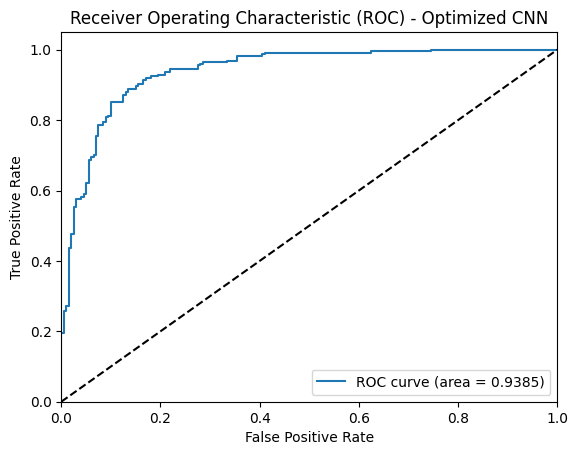

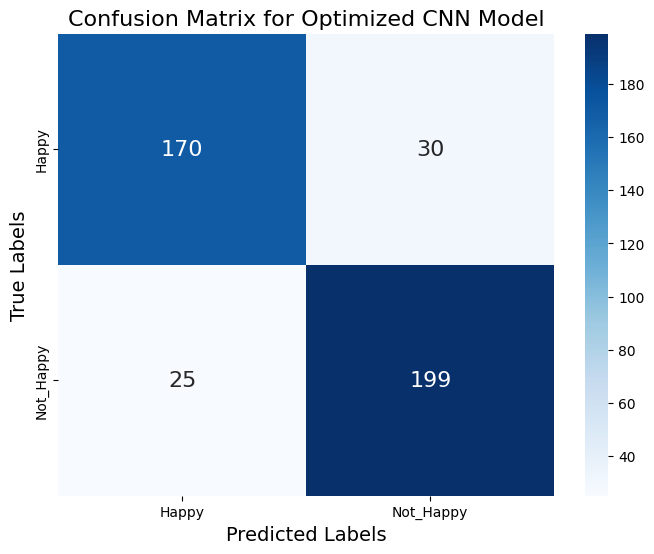

In [16]:
# Predict probabilities for the test set (Optimized CNN)
y_pred_prob_optimized_cnn = optimized_cnn_model.predict(X_test_normalized)

# Convert probabilities to binary predictions (0 or 1)
y_pred_optimized_cnn = (y_pred_prob_optimized_cnn > 0.5).astype("int32")

# Confusion Matrix for Optimized CNN
conf_matrix_optimized_cnn = confusion_matrix(y_test_encoded, y_pred_optimized_cnn)
print("Confusion Matrix (Optimized CNN):")
print(conf_matrix_optimized_cnn)

# Classification Report for Optimized CNN
class_report_optimized_cnn = classification_report(
    y_test_encoded, y_pred_optimized_cnn, output_dict=False, target_names=['Happy', 'Not_Happy']
)
print("\nClassification Report (Optimized CNN):")
print(class_report_optimized_cnn)

# ROC-AUC Score for Optimized CNN
roc_auc_optimized_cnn = roc_auc_score(y_test_encoded, y_pred_prob_optimized_cnn)
print(f"\nROC-AUC Score (Optimized CNN): {roc_auc_optimized_cnn:.4f}")

# ROC Curve for Optimized CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_encoded, y_pred_prob_optimized_cnn)
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, label=f"ROC curve (area = {roc_auc_optimized_cnn:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Optimized CNN')
plt.legend(loc="lower right")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
# Set up labels
class_names = ['Happy', 'Not_Happy']

# Plot confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized_cnn, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix for Optimized CNN Model', fontsize=16)
plt.show()

#**Optimized CNN Model Results**:

- The optimized CNN achieved an accuracy of 87%, demonstrating substantial improvements over the baseline CNN. The model shows balanced precision (87%) and recall for both classes. Specifically, it correctly identified 'Happy' faces with a recall of 89% and 'Not Happy' faces with a recall of 85%.

- Confusion Matrix: Minimal misclassifications, with good balance between both classes.

- The high ROC-AUC score of 0.94 suggests strong discrimination ability, indicating that the model reliably distinguishes between emotional categories. This model's performance shows promise for real-world applications requiring high emotional classification accuracy.


#**Transfer Learning with VGG16 Model**:

- This model leverages the pre-trained VGG16 architecture for transfer learning, where only the last four convolutional layers are unfrozen to fine-tune the model for our specific emotion detection task.

- We use a custom, seeded initializer and early stopping with restored best weights for optimal training stability and reproducibility.

This approach aims to utilize the VGG16's robust feature extraction capabilities while tailoring the final dense layers to achieve high classification accuracy on our dataset.


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6266 - loss: 0.6541 - val_accuracy: 0.1615 - val_loss: 1.4505
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7565 - loss: 0.5168 - val_accuracy: 0.2161 - val_loss: 1.3817
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8072 - loss: 0.4482 - val_accuracy: 0.3441 - val_loss: 1.3149
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8327 - loss: 0.3842 - val_accuracy: 0.6845 - val_loss: 0.7201
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8795 - loss: 0.2911 - val_accuracy: 0.6832 - val_loss: 0.8018
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9053 - loss: 0.2299 - val_accuracy: 0.5553 - val_loss: 0.9038
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9022 - loss: 0.2259 - val_accuracy: 0.3652 - val_loss: 1.5115


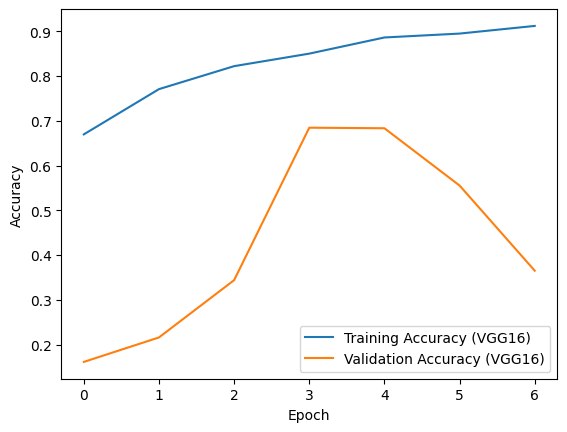

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 644ms/step - accuracy: 0.8288 - loss: 0.3591
Test Accuracy (VGG16): 0.7594339847564697


In [18]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import os
import matplotlib.pyplot as plt

# 1. Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# 2. Ensure TensorFlow uses deterministic behavior
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# 3. Load the VGG16 base model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# 4. Freeze layers except the last 4 for fine-tuning
for layer in base_model.layers[:-4]:
    layer.trainable = False

# 5. Define a seeded initializer
initializer = tf.keras.initializers.GlorotUniform(seed=seed)

# 6. Build the new model with reproducible dense layers
vgg16_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid', kernel_initializer=initializer)
])

# 7. Compile the model with Adam optimizer
optimizer = Adam(learning_rate=1e-4)
vgg16_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 8. Train the model with EarlyStopping
history = vgg16_model.fit(
    X_train_normalized, y_train_encoded,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]  # Restore best weights
)

# 9. Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy (VGG16)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 10. Evaluate the model on the test set
test_loss, test_acc_vgg16 = vgg16_model.evaluate(X_test_normalized, y_test_encoded)
print(f"Test Accuracy (VGG16): {test_acc_vgg16}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 833ms/step

Confusion Matrix (VGG16):
[[177  23]
 [ 79 145]]

Classification Report (VGG16):
              precision    recall  f1-score   support

       Happy       0.69      0.89      0.78       200
   Not_Happy       0.86      0.65      0.74       224

    accuracy                           0.76       424
   macro avg       0.78      0.77      0.76       424
weighted avg       0.78      0.76      0.76       424


ROC-AUC Score (VGG16): 0.8754


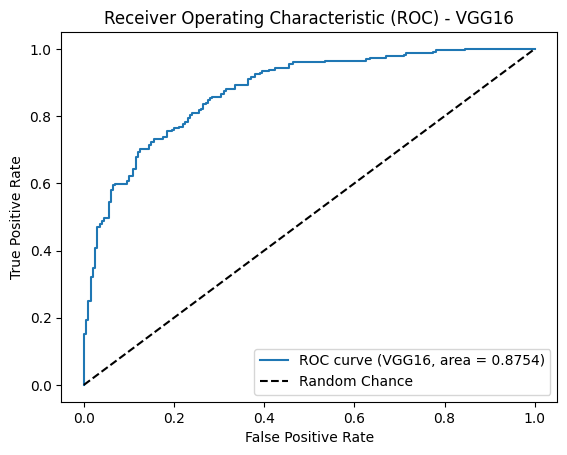

In [19]:
# 11. Generate predictions and evaluate performance
y_pred_prob_vgg16 = vgg16_model.predict(X_test_normalized)
y_pred_vgg16 = (y_pred_prob_vgg16 > 0.5).astype("int32")

conf_matrix_vgg16 = confusion_matrix(y_test_encoded, y_pred_vgg16)
print("\nConfusion Matrix (VGG16):")
print(conf_matrix_vgg16)

class_report_vgg16 = classification_report(y_test_encoded, y_pred_vgg16, output_dict=False, target_names=['Happy', 'Not_Happy'])
print("\nClassification Report (VGG16):")
print(class_report_vgg16)

roc_auc_vgg16 = roc_auc_score(y_test_encoded, y_pred_prob_vgg16)
print(f"\nROC-AUC Score (VGG16): {roc_auc_vgg16:.4f}")

# 12. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob_vgg16)
plt.plot(fpr, tpr, label=f"ROC curve (VGG16, area = {roc_auc_vgg16:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) - VGG16")
plt.legend(loc="best")
plt.show()

**VGG16 Model Evaluation Results**:

- The VGG16 model achieved a test accuracy of **76%** with a ROC-AUC score of **0.8754**. The model demonstrated high recall for the **Not_Happy** class at **89%**, indicating strong sensitivity in identifying Not_Happy instances.

- However, it had a lower recall for the **Happy** class at **65%**, suggesting some limitations in classifying positive emotions accurately. Precision for **Happy** was **86%**, showing good reliability when predicting Happy instances.

- Overall, the ROC-AUC score of **0.8754** signifies strong discriminatory power, though further tuning could help balance the recall for both classes, particularly for the Happy class.

This model is highly promising for applications that prioritize distinguishing Not_Happy faces accurately.


#**Optimized VGG16 Model:**

- This optimized VGG16 model utilizes transfer learning with a lighter custom head to improve classification efficiency.

- Key adjustments include freezing all layers except the last few for fine-tuning, a global average pooling layer for faster training, and adding dropout regularization to reduce overfitting.

- The model is compiled with a smaller learning rate (5e-5) to ensure gradual weight adjustments during fine-tuning. Additionally, we use data augmentation for enhanced robustness, without shuffling for consistent results. Callbacks, including early stopping and learning rate reduction, help prevent overfitting and accelerate convergence.


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.6388 - loss: 0.6492 - val_accuracy: 0.7901 - val_loss: 0.4416 - learning_rate: 5.0000e-05
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.7920 - loss: 0.4607 - val_accuracy: 0.8302 - val_loss: 0.3856 - learning_rate: 5.0000e-05
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.8407 - loss: 0.3673 - val_accuracy: 0.8420 - val_loss: 0.3547 - learning_rate: 5.0000e-05
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.8527 - loss: 0.3415 - val_accuracy: 0.8538 - val_loss: 0.3437 - learning_rate: 5.0000e-05
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.8770 - loss: 0.2818 - val_accuracy: 0.8538 - val_loss: 0.3570 - learning_rate: 5.0000e-05
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.9054 - loss: 0.2521 - val_accuracy: 0.8467 - val_loss: 0.3884 - learning_rate: 5.0000e-05
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.91

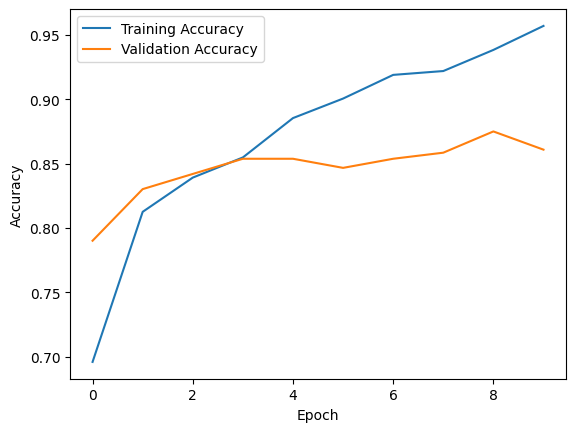

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 707ms/step - accuracy: 0.8404 - loss: 0.3806
Test Accuracy (Optimized VGG16): 0.8537735939025879


In [20]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle

# 1. Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# 2. Ensure TensorFlow uses deterministic algorithms
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# 3. Load the VGG16 base model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# 4. Freeze all layers except the last few for fine-tuning
for layer in base_model.layers[:-8]:
    layer.trainable = False

# 5. Build the model by adding a lighter custom head
optimized_vgg16 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Faster than Flatten layer
    layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeUniform(seed=seed)),
    layers.Dropout(0.4),  # Use dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# 6. Compile the model with a smaller learning rate
optimizer = Adam(learning_rate=5e-5)  # Lower learning rate for fine-tuning
optimized_vgg16.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 7. Manually shuffle the data for reproducibility
X_train_shuffled, y_train_shuffled = shuffle(X_train_normalized, y_train_encoded, random_state=seed)

# 8. Set up data augmentation with shuffle=False
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_shuffled)

# Reset seed to ensure consistent augmentation
np.random.seed(seed)
tf.random.set_seed(seed)

# 9. Define callbacks for faster convergence
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

# 10. Train the optimized VGG16 model
history = optimized_vgg16.fit(
    datagen.flow(X_train_shuffled, y_train_shuffled, batch_size=32, shuffle=False),  # Disable shuffling here
    epochs=10,  # Fewer epochs for faster training
    validation_data=(X_test_normalized, y_test_encoded),
    callbacks=callbacks
)

# 11. Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 12. Evaluate the optimized model on the test set
test_loss, test_acc_optimized_vgg16 = optimized_vgg16.evaluate(X_test_normalized, y_test_encoded)
print(f"Test Accuracy (Optimized VGG16): {test_acc_optimized_vgg16}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 702ms/step

Confusion Matrix (Optimized VGG16):
[[161  39]
 [ 23 201]]

Classification Report (Optimized VGG16):
              precision    recall  f1-score   support

       Happy       0.88      0.81      0.84       200
   Not_Happy       0.84      0.90      0.87       224

    accuracy                           0.85       424
   macro avg       0.86      0.85      0.85       424
weighted avg       0.86      0.85      0.85       424


ROC-AUC Score (Optimized VGG16): 0.8754


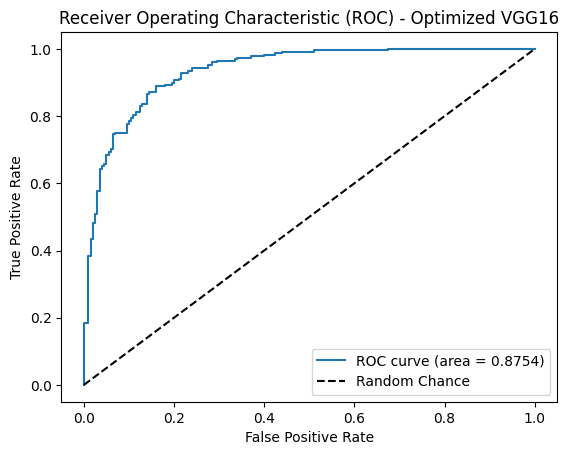

In [21]:
# 13. Generate predictions and evaluate performance
y_pred_prob_optimized_vgg16 = optimized_vgg16.predict(X_test_normalized)
y_pred_optimized_vgg16 = (y_pred_prob_optimized_vgg16 > 0.5).astype("int32")

# Confusion Matrix for Optimized VGG16
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

conf_matrix_vgg16 = confusion_matrix(y_test_encoded, y_pred_optimized_vgg16)
print("\nConfusion Matrix (Optimized VGG16):")
print(conf_matrix_vgg16)

# Classification Report for Optimized VGG16
class_report_optimized_vgg16 = classification_report(y_test_encoded, y_pred_optimized_vgg16, output_dict=False, target_names=['Happy', 'Not_Happy'])
print("\nClassification Report (Optimized VGG16):")
print(class_report_optimized_vgg16)

# ROC-AUC Score for Optimized VGG16
roc_auc_optimized_vgg16 = roc_auc_score(y_test_encoded, y_pred_prob_vgg16)
print(f"\nROC-AUC Score (Optimized VGG16): {roc_auc_optimized_vgg16:.4f}")

# Plot ROC Curve for Optimized VGG16
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_test_encoded, y_pred_prob_optimized_vgg16)
plt.figure()
plt.plot(fpr_vgg16, tpr_vgg16, label=f"ROC curve (area = {roc_auc_optimized_vgg16:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) - Optimized VGG16")
plt.legend(loc="best")
plt.show()

#**Results for Optimized VGG16:**

Confusion Matrix:

- Correctly classified 161 'Not Happy' images and 201 'Happy' images.
- Misclassified 39 'Not Happy' and 23 'Happy' images.


Classification Metrics:

- Not Happy: Precision = 0.88, Recall = 0.81, F1-score = 0.84
- Happy: Precision = 0.84, Recall = 0.90, F1-score = 0.87
- Overall Accuracy: 85%
- ROC-AUC Score: 0.8754, indicating strong model performance across thresholds.


- Interpretation:

This optimized VGG16 model displays a high degree of accuracy and balanced precision and recall across both classes. The model’s performance, especially with the ROC-AUC of 0.8754, suggests it is effective in distinguishing between 'Happy' and 'Not Happy' categories. This version’s accuracy and balance between classes make it well-suited for real-world applications where misclassification costs are significant.

In [22]:
from sklearn.metrics import classification_report

# Convert all classification reports into dictionaries
class_report_base_ann = classification_report(y_test_encoded, y_pred_base_ann, output_dict=True, target_names=['Happy', 'Not_Happy'])
class_report_optimized_ann = classification_report(y_test_encoded, y_pred_optimized_ann, output_dict=True, target_names=['Happy', 'Not_Happy'])
class_report_base_cnn = classification_report(y_test_encoded, y_pred_cnn, output_dict=True, target_names=['Happy', 'Not_Happy'])
class_report_optimized_cnn = classification_report(y_test_encoded, y_pred_optimized_cnn, output_dict=True, target_names=['Happy', 'Not_Happy'])
class_report_vgg16 = classification_report(y_test_encoded, y_pred_vgg16, output_dict=True, target_names=['Happy', 'Not_Happy'])
class_report_optimized_vgg16 = classification_report(y_test_encoded, y_pred_optimized_vgg16, output_dict=True, target_names=['Happy', 'Not_Happy'])

In [23]:
import pandas as pd

# Collect metrics from predefined variables, with rounded values
data = {
    'Model': ['Base ANN', 'Optimized ANN', 'Base CNN', 'Optimized CNN', 'Base VGG16', 'Optimized VGG16'],

    'Test Accuracy (%)': [
        round(test_acc_base_ann * 100, 2),
        round(test_acc_optimized_ann * 100, 2),
        round(test_acc_base_cnn * 100, 2),
        round(test_acc_optimized_cnn * 100, 2),
        round(test_acc_vgg16 * 100, 2),
        round(test_acc_optimized_vgg16 * 100, 2)
    ],

    'ROC-AUC Score': [
        round(roc_auc_base_ann, 2),
        round(roc_auc_optimized_ann, 2),
        round(roc_auc_base_cnn, 2),
        round(roc_auc_optimized_cnn, 2),
        round(roc_auc_vgg16, 2),
        round(roc_auc_optimized_vgg16, 2)
    ],

    'Precision (Happy)': [
        round(class_report_base_ann['Happy']['precision'], 2),
        round(class_report_optimized_ann['Happy']['precision'], 2),
        round(class_report_base_cnn['Happy']['precision'], 2),
        round(class_report_optimized_cnn['Happy']['precision'], 2),
        round(class_report_vgg16['Happy']['precision'], 2),
        round(class_report_optimized_vgg16['Happy']['precision'], 2)
    ],

    'Recall (Happy)': [
        round(class_report_base_ann['Happy']['recall'], 2),
        round(class_report_optimized_ann['Happy']['recall'], 2),
        round(class_report_base_cnn['Happy']['recall'], 2),
        round(class_report_optimized_cnn['Happy']['recall'], 2),
        round(class_report_vgg16['Happy']['recall'], 2),
        round(class_report_optimized_vgg16['Happy']['recall'], 2)
    ],

    'F1-Score (Happy)': [
        round(class_report_base_ann['Happy']['f1-score'], 2),
        round(class_report_optimized_ann['Happy']['f1-score'], 2),
        round(class_report_base_cnn['Happy']['f1-score'], 2),
        round(class_report_optimized_cnn['Happy']['f1-score'], 2),
        round(class_report_vgg16['Happy']['f1-score'], 2),
        round(class_report_optimized_vgg16['Happy']['f1-score'], 2)
    ],

    'Precision (Not_Happy)': [
        round(class_report_base_ann['Not_Happy']['precision'], 2),
        round(class_report_optimized_ann['Not_Happy']['precision'], 2),
        round(class_report_base_cnn['Not_Happy']['precision'], 2),
        round(class_report_optimized_cnn['Not_Happy']['precision'], 2),
        round(class_report_vgg16['Not_Happy']['precision'], 2),
        round(class_report_optimized_vgg16['Not_Happy']['precision'], 2)
    ],

    'Recall (Not_Happy)': [
        round(class_report_base_ann['Not_Happy']['recall'], 2),
        round(class_report_optimized_ann['Not_Happy']['recall'], 2),
        round(class_report_base_cnn['Not_Happy']['recall'], 2),
        round(class_report_optimized_cnn['Not_Happy']['recall'], 2),
        round(class_report_vgg16['Not_Happy']['recall'], 2),
        round(class_report_optimized_vgg16['Not_Happy']['recall'], 2)
    ],

    'F1-Score (Not_Happy)': [
        round(class_report_base_ann['Not_Happy']['f1-score'], 2),
        round(class_report_optimized_ann['Not_Happy']['f1-score'], 2),
        round(class_report_base_cnn['Not_Happy']['f1-score'], 2),
        round(class_report_optimized_cnn['Not_Happy']['f1-score'], 2),
        round(class_report_vgg16['Not_Happy']['f1-score'], 2),
        round(class_report_optimized_vgg16['Not_Happy']['f1-score'], 2)
    ]
}

# Create the DataFrame
df_mc = pd.DataFrame(data)

# Display the DataFrame
print("Model Comparison Table:")
print(df_mc)

# Save the DataFrame to Google Drive
file_path = '/content/drive/MyDrive/model_comparison_11_01_24.csv'
df_mc.to_csv(file_path, index=False)

# Confirm that the file was saved
if os.path.exists(file_path):
    print(f"File saved successfully at: {file_path}")
else:
    print("File was not saved. Please check the path and try again.")

Model Comparison Table:
             Model  Test Accuracy (%)  ROC-AUC Score  Precision (Happy)  \
0         Base ANN              65.09           0.74               0.60   
1    Optimized ANN              70.75           0.76               0.67   
2         Base CNN              83.25           0.90               0.80   
3    Optimized CNN              87.03           0.94               0.87   
4       Base VGG16              75.94           0.88               0.69   
5  Optimized VGG16              85.38           0.88               0.88   

   Recall (Happy)  F1-Score (Happy)  Precision (Not_Happy)  \
0            0.81              0.69                   0.75   
1            0.73              0.70                   0.74   
2            0.85              0.83                   0.86   
3            0.85              0.86                   0.87   
4            0.89              0.78                   0.86   
5            0.81              0.84                   0.84   

   Recall (Not_

In [24]:
df_mc

,Model,Test Accuracy (%),ROC-AUC Score,Precision (Happy),Recall (Happy),F1-Score (Happy),Precision (Not_Happy),Recall (Not_Happy),F1-Score (Not_Happy)
0,Base ANN,65.09,0.74,0.60,0.81,0.69,0.75,0.51,0.61
1,Optimized ANN,70.75,0.76,0.67,0.73,0.70,0.74,0.68,0.71
2,Base CNN,83.25,0.90,0.80,0.85,0.83,0.86,0.81,0.84
3,Optimized CNN,87.03,0.94,0.87,0.85,0.86,0.87,0.89,0.88
4,Base VGG16,75.94,0.88,0.69,0.89,0.78,0.86,0.65,0.74
5,Optimized VGG16,85.38,0.88,0.88,0.81,0.84,0.84,0.90,0.87



#**Model Comparison Observations:**
**The Model Comparison Table clearly highlights how each model type (ANN, CNN, and VGG16) performed across key metrics, providing insights into model improvements as we moved through baseline and optimized versions.**

Interpretation of Results:

Accuracy & ROC-AUC:

- Both optimized models (CNN and VGG16) deliver significantly higher accuracy:
- **Optimized CNN: 87%**
- **Optimized VGG16: 85%**


and **ROC-AUC scores** compared to their base versions, indicating robust model enhancements through fine-tuning and architecture adjustments:

- **Optimized CNN: 0.94**
- **Optimized VGG16: 0.88**

Class-Specific Performance:

- Happy class: Precision and Recall for the Happy class consistently improve with optimized models, especially for Optimized CNN and Optimized VGG16, balancing both precision and recall, crucial for achieving high F1-scores.
- Not Happy class: Optimized CNN and VGG16 deliver high recall rates for Not Happy, reaching up to 90% with Optimized VGG16, signaling effective model sensitivity.

Recommendation:

- Given the highest overall performance, Optimized CNN emerges as the best model for this project with a robust balance between accuracy, F1-scores, and ROC-AUC, making it highly suitable for deployment in a business setting.

**Save the Optimized CNN Model**

In [28]:
# Save the optimized CNN model to Google Drive
model_save_path = "/content/drive/MyDrive/optimized_cnn_model.h5"  # Specify your desired path
optimized_cnn_model.save(model_save_path)
print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/optimized_cnn_model.h5


**Load the Model and Predict Emotions on Selfies**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


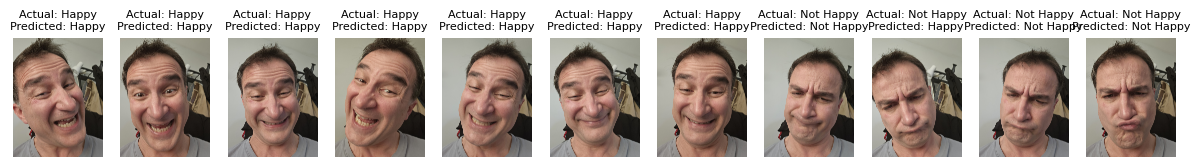

Confusion Matrix:
[[7 0]
 [1 3]]

Classification Report:
              precision    recall  f1-score   support

       Happy       0.88      1.00      0.93         7
   Not Happy       1.00      0.75      0.86         4

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90        11
weighted avg       0.92      0.91      0.91        11



In [42]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# Load the optimized CNN model
model_load_path = "/content/drive/MyDrive/optimized_cnn_model.h5"  # Ensure this path is correct
loaded_model = load_model(model_load_path)

# Ensure labels are interpreted correctly
label_mapping = {0: "Happy", 1: "Not Happy"}

# Paths to the selfies
image_paths = [
    "/content/drive/MyDrive/Happy_1.jpg", "/content/drive/MyDrive/Happy_2.jpg",
    # Add paths for all Happy and Not_Happy images
    "/content/drive/MyDrive/Happy_3.jpg",
    "/content/drive/MyDrive/Happy_4.jpg",
    "/content/drive/MyDrive/Happy_5.jpg",
    "/content/drive/MyDrive/Happy_6.jpg",
    "/content/drive/MyDrive/Happy_7.jpg",
    "/content/drive/MyDrive/Not_Happy_1.jpg",
    "/content/drive/MyDrive/Not_Happy_2.jpg",
    "/content/drive/MyDrive/Not_Happy_3.jpg",
    "/content/drive/MyDrive/Not_Happy_4.jpg"
    # Continue for all images
]

# Extract actual labels from file names
actual_labels = [0 if os.path.basename(path).startswith("Happy") else 1 for path in image_paths]

# Preprocess images and collect predictions
predicted_labels = []
for image_path in image_paths:
    # Load, resize, and normalize image
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (48, 48))  # Adjusting to model input
    normalized_image = resized_image / 255.0
    input_image = np.expand_dims(normalized_image, axis=0)

    # Predict with the model
    prediction = loaded_model.predict(input_image)
    predicted_label = 0 if prediction[0][0] < 0.5 else 1  # Threshold 0.5 for binary classification
    predicted_labels.append(predicted_label)

# Display predictions alongside actual labels
fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
for i, image_path in enumerate(image_paths):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    label_text = f"Actual: {label_mapping[actual_labels[i]]}\nPredicted: {label_mapping[predicted_labels[i]]}"

    axes[i].imshow(image_rgb)
    axes[i].set_title(label_text, fontsize=8)
    axes[i].axis('off')
plt.show()

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(actual_labels, predicted_labels))
print("\nClassification Report:")
print(classification_report(actual_labels, predicted_labels, target_names=["Happy", "Not Happy"]))


**Real-World Testing with Selfies**

To demonstrate the model’s practical application, I tested it on personal “Happy” and “Not Happy” selfies. This approach highlights the model’s usability on realistic, unseen data, simulating how it might operate in real-life scenarios, such as emotion detection for personalized services in healthcare or customer service. By testing with authentic, unprocessed images, we can better gauge the model’s performance on diverse inputs beyond the training set, reinforcing its potential for deployment.